In [142]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 

In [143]:
data_train_path = r'C:\Users\Om Chaudhari\OneDrive\Desktop\Project SEM V\Dataset\TRAIN'
data_test_path = r'C:\Users\Om Chaudhari\OneDrive\Desktop\Project SEM V\Dataset\TEST'

In [144]:
img_width = 180
img_height = 180

In [145]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    validation_split=False)

#print(data_train.class_names)
data_cat = data_train.class_names

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_height, img_width),
    validation_split=False)

#print(data_test.class_names)
data_cat = data_test.class_names

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [146]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),  # Normalize the images
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),  # Flatten before fully connected layers
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dense(len(data_cat), activation='softmax')  # Final classification layer
])



In [147]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs_size = 1
history = model.fit(data_train, epochs=epochs_size)

706/706 ━━━━━━━━━━━━━━━━━━━━ 444s 627ms/step - accuracy: 0.7480 - loss: 0.7575


Text(0.5, 1.0, 'Loss')

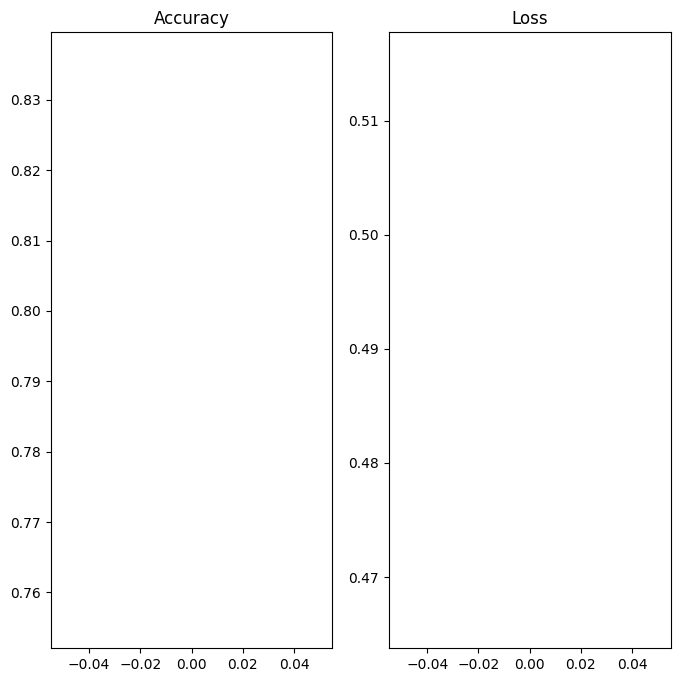

In [148]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.title('Loss')

In [158]:

image ='organic.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)



In [159]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [160]:
score = tf.nn.softmax(predict)

In [161]:
print('Waste in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Waste in image is O with accuracy of 63.32


In [162]:
model.save('Image_classify.keras')